## Computational Inteligence
### Project Phase1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score, pair_confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

Import data:

In [ ]:
from typing import Tuple

def load_data(train_data: bool = True) -> Tuple[np.ndarray, np.ndarray]:
    """
    loads train/test features with image labels.
    """
    if train_data:
        data = np.load(f'/content/drive/MyDrive/kljh,bgjkl;/train_data.npz')
    else:
        data = np.load(f'/content/drive/MyDrive/kljh,bgjkl;/test_data.npz')

    features = data['features']
    img_labels = data['img_labels']

    return features, img_labels


def load_data_with_domain_label() -> Tuple[np.ndarray, np.ndarray]:
    """
    loads portion of training features with domain label
    """
    data = np.load(f'/content/drive/MyDrive/kljh,bgjkl;/train_data_w_label.npz')
    train_features = data['features']
    domain_labels = data['domain_labels']

    return train_features, domain_labels


# Train Data with image labels
train_features, train_image_labels = load_data(True)
# print(train_features.shape)

# print(image_labels.shape)
# print(f'Number of training samples: {train_features.shape[0]}')

#Test Data with image labels
test_features, test_image_labels = load_data(False)
# print(test_features.shape)
# print(image_labels.shape)

#5% of train data with domain label
domain_test_features, image_domain = load_data_with_domain_label()
# print(train_features.shape)
# print(image_labels.shape)

At first:
We group the data by image labels and implement KMeans with different k on each group.
Then we check the score of each clustring and find the best k for each group of images that have the same image label. In order to find number of clusters which is for domain difference in each group of them, and after that generalize it for the whole data.

In [ ]:
df = pd.DataFrame(train_features)
df["image label"] = train_image_labels
print(df["image label"].unique())

[1 4 6 7 2 5 0 3 8 9]


As it observed, there are 10 groups of images base on image label.

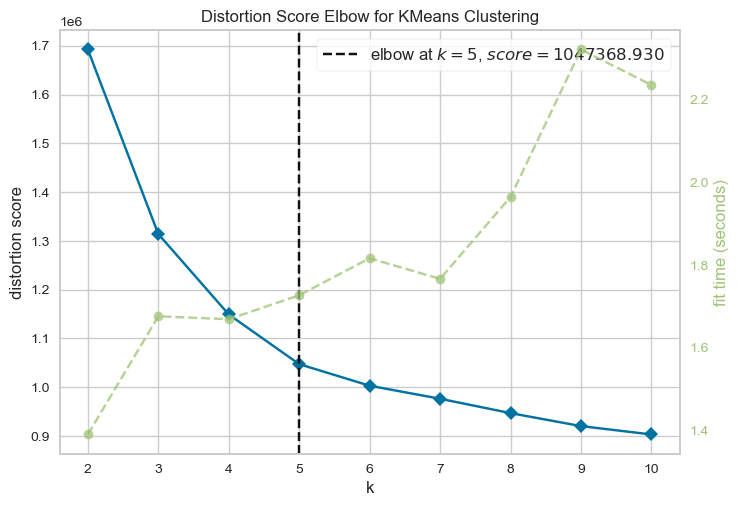

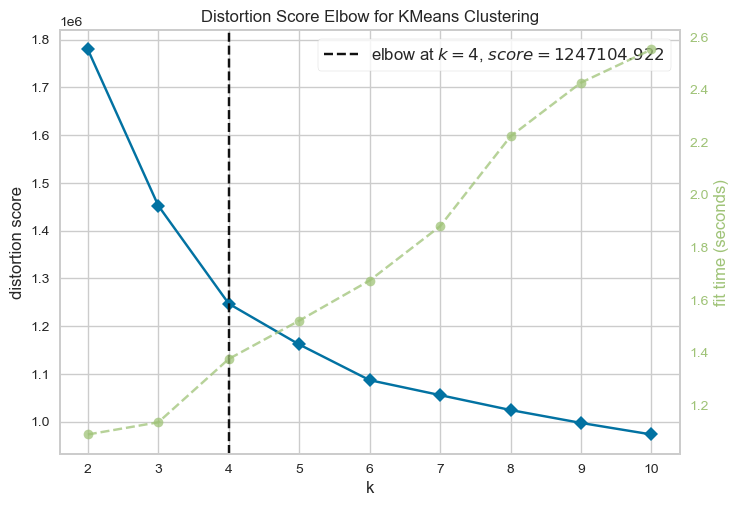

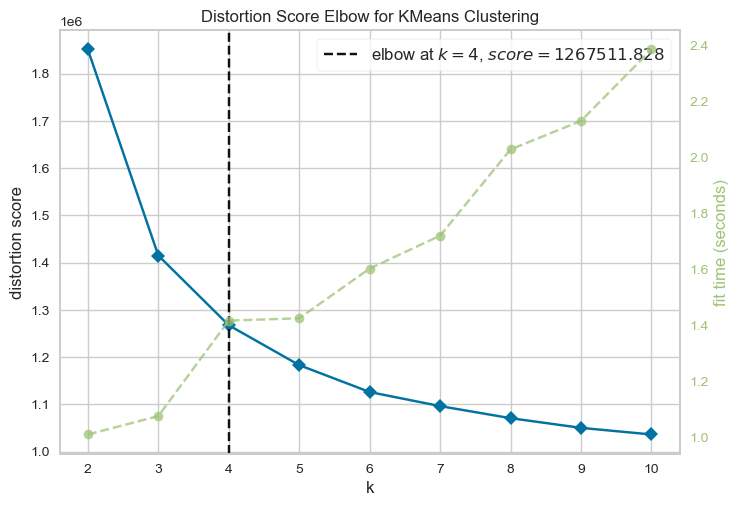

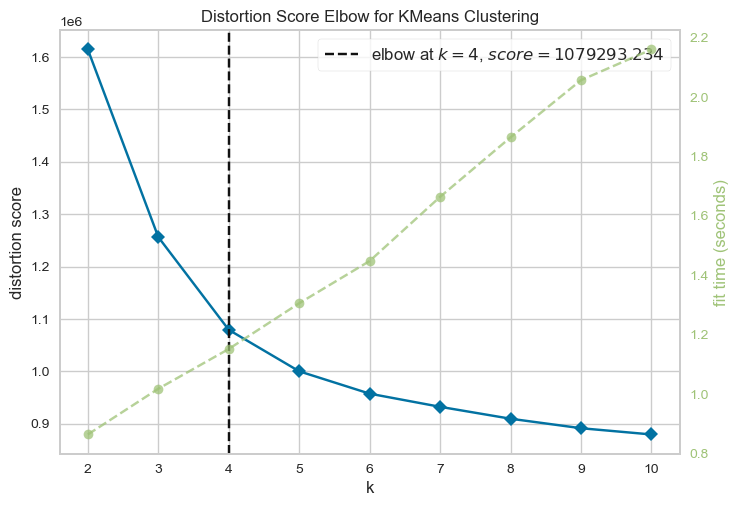

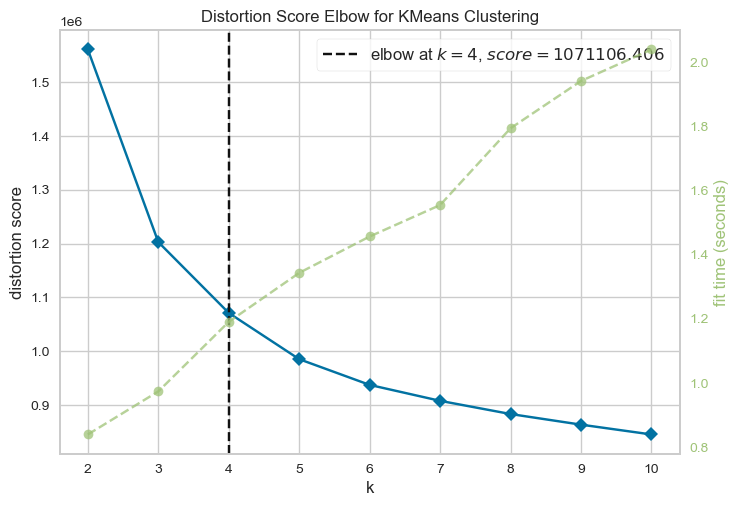

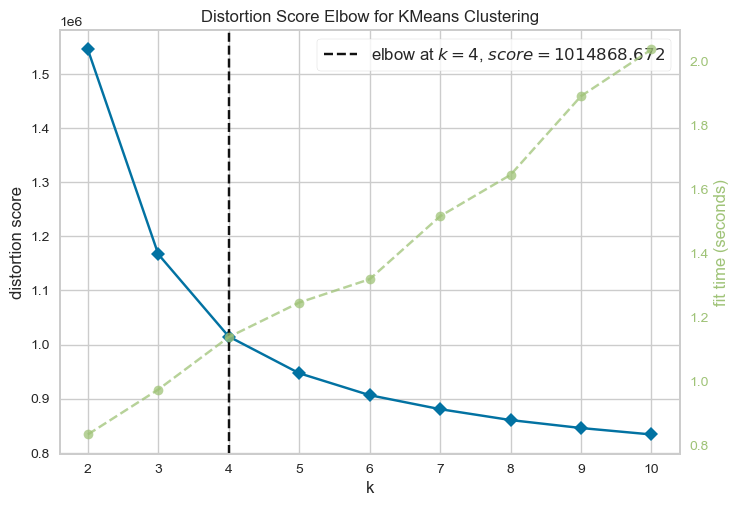

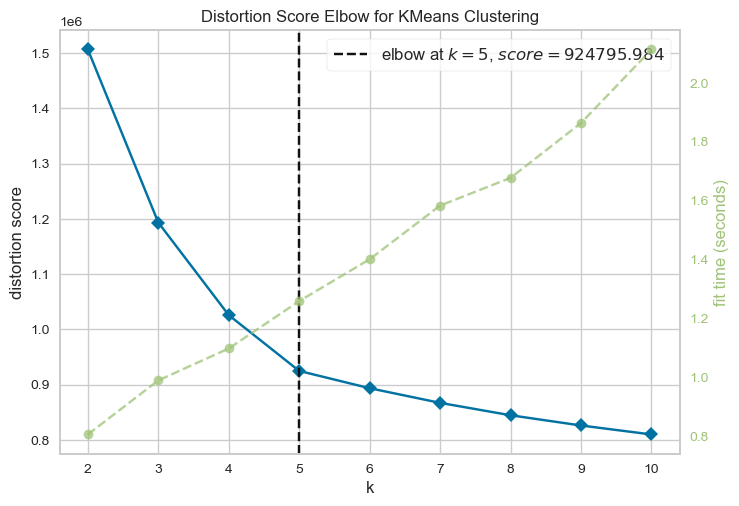

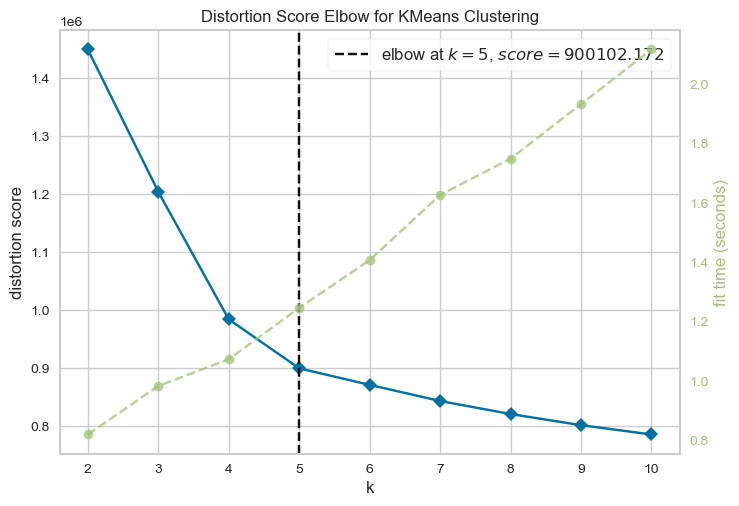

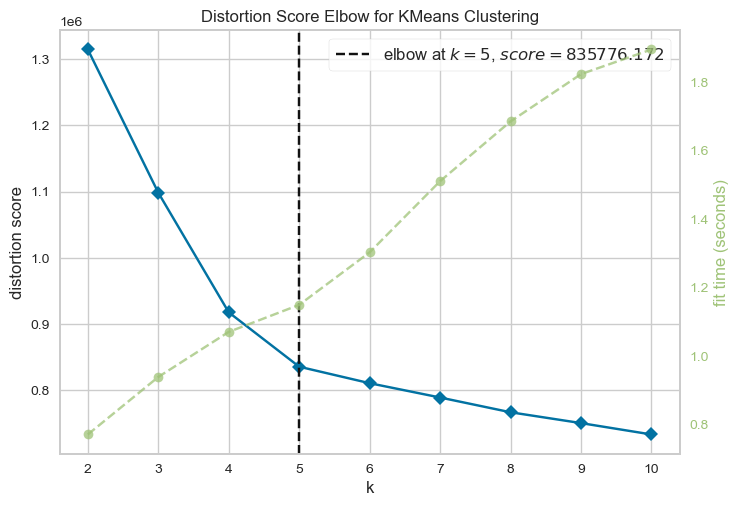

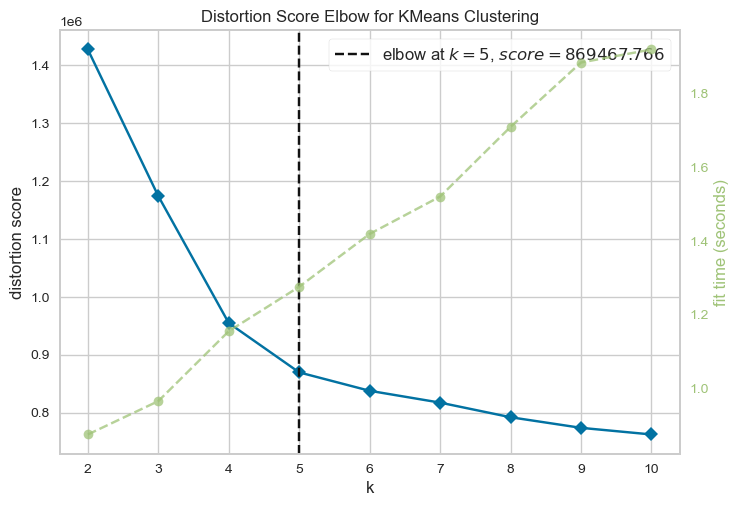

In [ ]:
score=[]
for i in range(0,10):
    # extract data of images with the label i
    new_df = df.loc[df["image label"] == i]
    # removing image label
    new_df = new_df.iloc[:, 0:-1]
    # building model
    kmeans = KMeans()
    # find the best k between 2 to 10
    visualize = KElbowVisualizer(kmeans, k = (2,11))
    visualize.fit(new_df)
    score.append(visualize.elbow_value_)
    visualize.show()
plt.show()

The approach showed us that about 4 to 5 cluster is a proper number of clustering for the whole data.

In [ ]:
def pca_plot(x):

    pca2 = PCA(n_components=2, svd_solver='full')

    pca2.fit(x)

    data_pca2 = pca2.transform(x)
    print(data_pca2.shape)

    xs = data_pca2[:,0]
    ys = data_pca2[:,1]
    plt.scatter(ys, xs, s=3, alpha=0.1)

    plt.grid(False)
    plt.xlabel('PCA-1')
    plt.ylabel('PCA-2')

    plt.show()

(20000, 2)


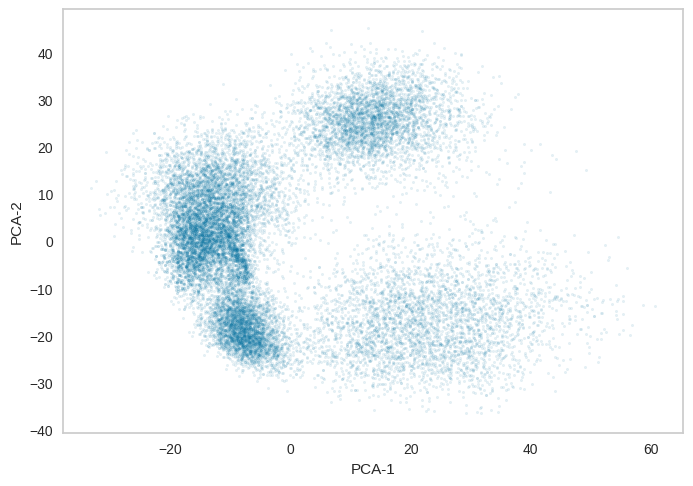

In [ ]:
pca_plot(train_features)

Check which K is proper by calinski_harabasz_score on the whole data

[5507.317139516098, 6293.28408692804, 5695.494508125838, 4895.261688620122, 4208.977157829627, 3687.1254324622337, 3315.6529510885043, 2997.5521812775974, 2746.7231762870106]


Text(0, 0.5, 'calinski_harabasz_score')

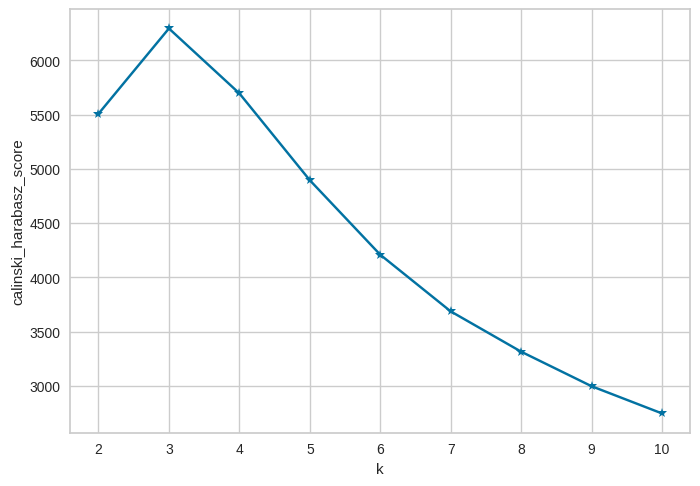

In [ ]:
scores = []
list_k = list(range(2,11))

for k in list_k:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(train_features)
    score = calinski_harabasz_score(train_features,kmeans.labels_)
    scores.append(score)
print(scores)
plt.plot(list_k, scores, '-*')
plt.xlabel('k')
plt.ylabel('calinski_harabasz_score')

In [ ]:
# visualize data in 2D

def tsne_plot(x,y, n):
    from sklearn.manifold import TSNE
    from numpy import reshape
    import seaborn as sns
    import pandas as pd

    x = x
    y = y
    tsne = TSNE(n_components=2, verbose=1, random_state=123)
    z = tsne.fit_transform(x)
    df = pd.DataFrame()
    df["y"] = y
    df["comp-1"] = z[:, 0]
    df["comp-2"] = z[:, 1]

    sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), s=5, alpha = 0.3,
                    palette=sns.color_palette("hls", n),
                    data=df).set(title="T-SNE projection")
    import matplotlib.pyplot as plt
    plt.show()

In [ ]:
k = 3
kmeans_under_cluster = KMeans(n_clusters=k)
predicted = kmeans_under_cluster.fit_predict(train_features)

df = pd.DataFrame(train_features)
df["cluster"] = predicted

print(df["cluster"].unique())
max = 0
for i in range(0,3):
  print(df.loc[df["cluster"] == i].shape)
  if df.loc[df["cluster"] == i].shape[0] > 10000:
    df_biggest_cluster = df.loc[df["cluster"] == i]


[1 2 0]
(12107, 2049)
(4096, 2049)
(3797, 2049)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12107 samples in 0.012s...
[t-SNE] Computed neighbors for 12107 samples in 26.747s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12107
[t-SNE] Computed conditional probabilities for sample 2000 / 12107
[t-SNE] Computed conditional probabilities for sample 3000 / 12107
[t-SNE] Computed conditional probabilities for sample 4000 / 12107
[t-SNE] Computed conditional probabilities for sample 5000 / 12107
[t-SNE] Computed conditional probabilities for sample 6000 / 12107
[t-SNE] Computed conditional probabilities for sample 7000 / 12107
[t-SNE] Computed conditional probabilities for sample 8000 / 12107
[t-SNE] Computed conditional probabilities for sample 9000 / 12107
[t-SNE] Computed conditional probabilities for sample 10000 / 12107
[t-SNE] Computed conditional probabilities for sample 11000 / 12107
[t-SNE] Computed conditional probabilities for sample 12000 / 12107
[t-SNE] Computed conditional probabilities for sa

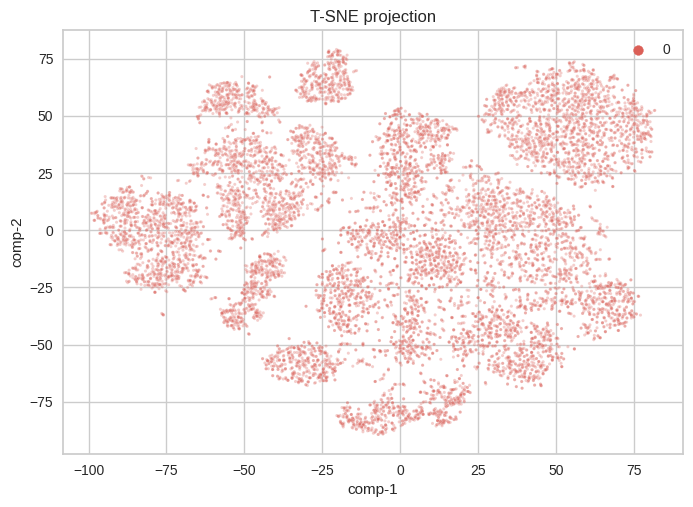

In [ ]:

df_biggest_cluster_features = df_biggest_cluster.iloc[:, 0:-1]
tsne_plot(df_biggest_cluster_features, df_biggest_cluster["cluster"], 3)


We bulid a KMeans model on the data with k = 4, 5, 6, 7, and then plot TSNE of them to see the performance of clustring and how it has sperated the data.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.018s...
[t-SNE] Computed neighbors for 20000 samples in 71.969s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

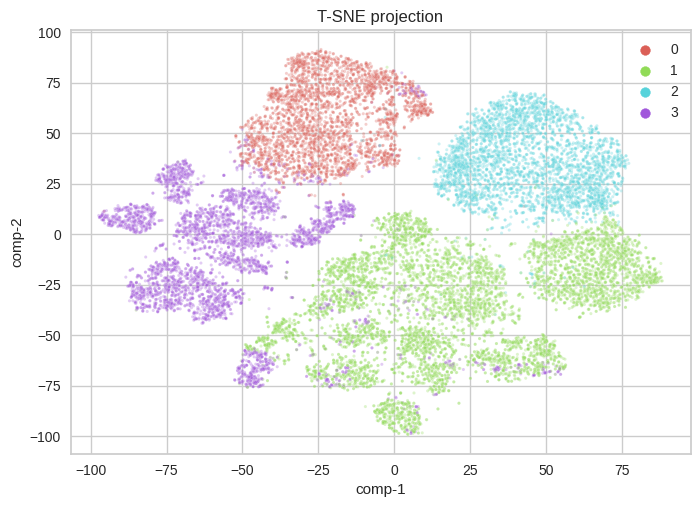

In [ ]:
k = 4
kmeans_with_k_4 = KMeans(n_clusters=k)
predicted_kmeans_with_k_4 = kmeans_with_k_4.fit_predict(train_features)
tsne_plot(train_features, predicted_kmeans_with_k_4, 4)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.018s...
[t-SNE] Computed neighbors for 20000 samples in 68.707s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

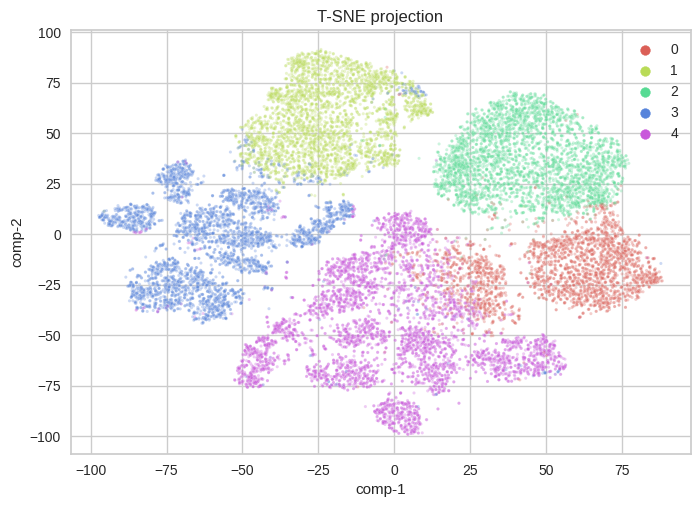

In [ ]:
k = 5
kmeans_with_k_5 = KMeans(n_clusters=k)
predicted_kmeans_with_k_5 = kmeans_with_k_5.fit_predict(train_features)
tsne_plot(train_features, predicted_kmeans_with_k_5, 5)

It looks like k = 5 has clustered the data better.

Now we test k = 6 and see the result too.

In [ ]:
k = 6
kmeans_with_k_6 = KMeans(n_clusters=k)
predicted_kmeans_with_k_6 = kmeans_with_k_6.fit_predict(train_features)
tsne_plot(train_features, predicted_kmeans_with_k_6, 6)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.024s...
[t-SNE] Computed neighbors for 20000 samples in 71.768s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

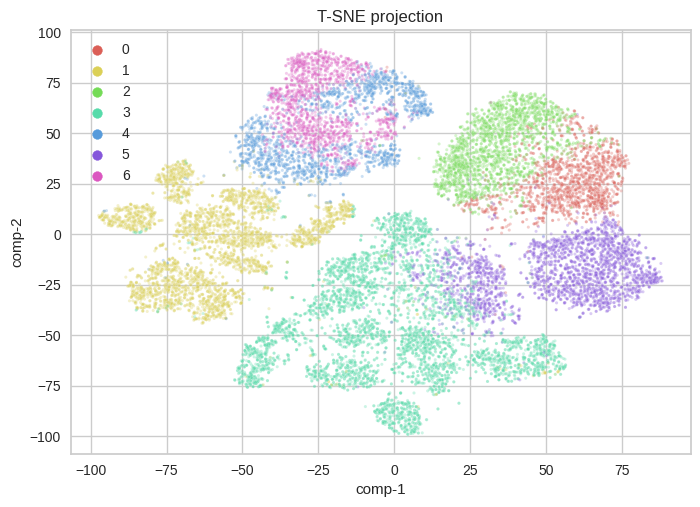

In [ ]:
k = 7
kmeans_with_k_7 = KMeans(n_clusters=k)
predicted_kmeans_with_k_7 = kmeans_with_k_7.fit_predict(train_features)
tsne_plot(train_features, predicted_kmeans_with_k_7, 7)

Now we use dendogram diagram.

The dendrogram is a tree-like diagram where the top is the root and the bottom part is the leaves. The leaves are made up of individual data points and a new node parent is added for each two clusters that are merged.

The vertical axis(cluster distance) depicts the Euclidean distance(in this case). As we move up from the bottom, the leaves merge into branches and this corresponds to the samples/clusters that are similar to each other. The vertical distance represents how similar the clusters are, so for example, the greater the vertical distances before the merge happen, the more dissimilar the clusters are.


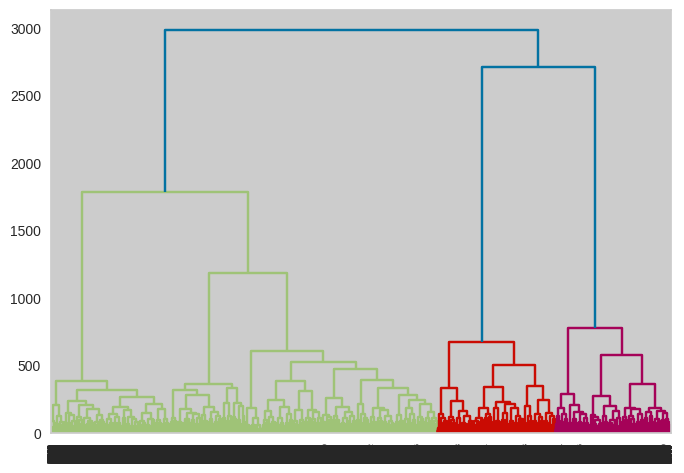

In [ ]:
linkage_data = linkage(train_features, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

To find the the number of clusters if we cut the diagram at 1000, it will provide us that data contains of 5 cluster.

In [ ]:
clustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit(train_features)
np.unique(clustering.labels_)
tsne_plot(train_features, clustering.labels_, 5)

array([0, 1, 2, 3, 4])

Now we follow heirchical clustring methods. At first we build a KMeans model with k = 7, for an over clustring and then by the metric of comparing distances of clusters centroids and then base on these distances, we use a agglomerative clustring to merge similar clusters.

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import pdist, squareform

kmeans = KMeans(n_clusters=7).fit(train_features)
labels = kmeans.labels_

distances = pairwise_distances(kmeans.cluster_centers_)

agg_cluster = AgglomerativeClustering(n_clusters=None, affinity='precomputed', linkage='average', distance_threshold=20)
agg_cluster.fit(distances)

final_labels = agg_cluster.labels_[kmeans.labels_]

print(np.unique(final_labels))

[0 1 2 3 4]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.028s...
[t-SNE] Computed neighbors for 20000 samples in 77.627s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

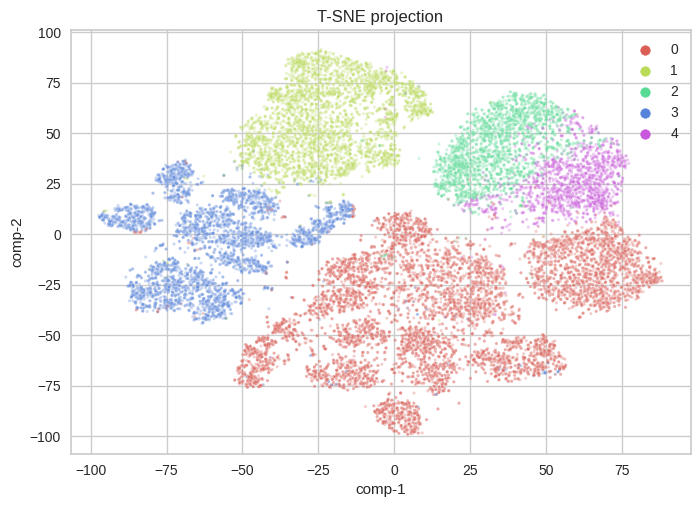

In [ ]:
tsne_plot(train_features, final_labels, 5)

An approach is to produce an under cluster, and cluster the biggest cluster. We have built kmeans with k = 3 and recognized biggest cluster already.

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters = 3, linkage="ward")
clustering_model.fit(df_biggest_cluster_features)
labels_no_clusters = clustering_model.labels_

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12107 samples in 0.015s...
[t-SNE] Computed neighbors for 12107 samples in 25.681s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12107
[t-SNE] Computed conditional probabilities for sample 2000 / 12107
[t-SNE] Computed conditional probabilities for sample 3000 / 12107
[t-SNE] Computed conditional probabilities for sample 4000 / 12107
[t-SNE] Computed conditional probabilities for sample 5000 / 12107
[t-SNE] Computed conditional probabilities for sample 6000 / 12107
[t-SNE] Computed conditional probabilities for sample 7000 / 12107
[t-SNE] Computed conditional probabilities for sample 8000 / 12107
[t-SNE] Computed conditional probabilities for sample 9000 / 12107
[t-SNE] Computed conditional probabilities for sample 10000 / 12107
[t-SNE] Computed conditional probabilities for sample 11000 / 12107
[t-SNE] Computed conditional probabilities for sample 12000 / 12107
[t-SNE] Computed conditional probabilities for sa

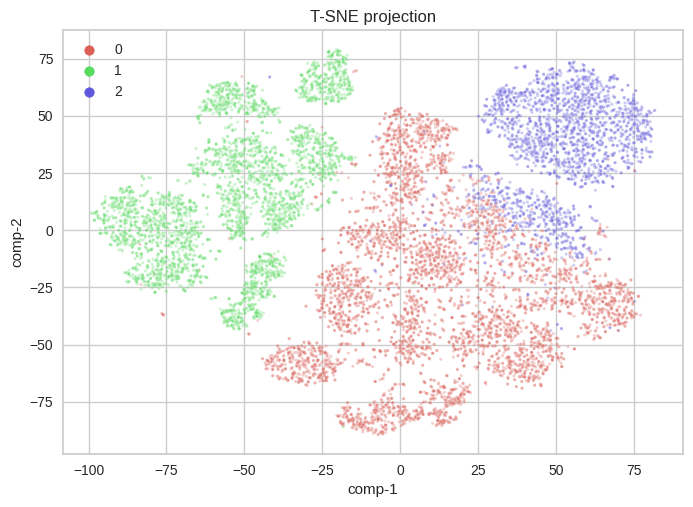

In [ ]:
tsne_plot(df_biggest_cluster_features, labels_no_clusters, 3)

Over all the agglomerative clustring with number of clusters of 5, looks like having better results. The model name was $ clustring $.

We evaluate the clustring on the test data:

In [ ]:
predict = clustering.fit_predict(test_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.029s...
[t-SNE] Computed neighbors for 10000 samples in 17.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.545841
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.153923
[t-SNE] KL divergence after 1000 iterations: 1.690712


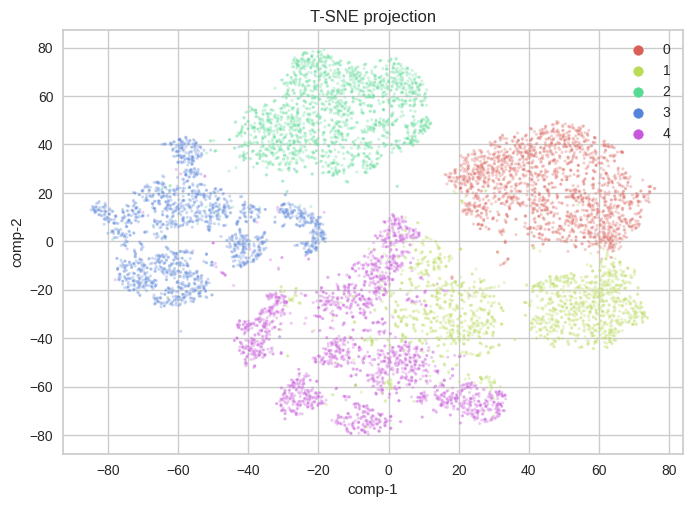

In [ ]:
tsne_plot(test_features, predict, 5)

In [ ]:
print(calinski_harabasz_score(test_features, predict))
print(silhouette_score(test_features, predict))
print(davies_bouldin_score(test_features, predict)) 


2363.7299617895596
0.15562463
2.0927549700638766


As we mentioned in the documentation some of these metrics is not good for our type of data.

The map of our clusters to domains is one to one.

Test on data with domains:

In [ ]:
predict_domain = clustering.fit_predict(domain_test_features)

score = adjusted_mutual_info_score(image_domain,predict_domain)

print(score)

0.8294122888189421


In [ ]:
score = adjusted_rand_score(image_domain,predict_domain)

print(score)

0.8060650170337942


We reached to score above 80 percent, which is really good.

### Authors: Pouria Nazemi & Tahoora Saeedi